In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/wm/lwlxbmjx2hv6p504ygbs86pr0000gn/T/ipykernel_31441/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train100_10 = pd.read_csv("train-100-10.csv")
train100_100 = pd.read_csv("train-100-100.csv")
train1000_100 = pd.read_csv("train-1000-100.csv")
test100_10 = pd.read_csv("test-100-10.csv")
test100_100 = pd.read_csv("test-100-100.csv")
test1000_100 = pd.read_csv("test-1000-100.csv")

In [3]:
train100_10 = train100_10.dropna(axis=1)

In [4]:
train1000_100.loc[0:49].to_csv("train-50(1000)-100.csv")
train1000_100.loc[0:99].to_csv("train-100(1000)-100.csv")
train1000_100.loc[0:149].to_csv("train-150(1000)-100.csv")

In [5]:
train_50_1000_100 = pd.read_csv("train-50(1000)-100.csv",index_col=0)
train_100_1000_100 = pd.read_csv("train-100(1000)-100.csv",index_col=0)
train_150_1000_100 = pd.read_csv("train-150(1000)-100.csv",index_col=0)

In [6]:
datasets = [['train100_10',train100_10,test100_10],
 ['train100_100',train100_100,test100_100],
 ['train1000_100',train1000_100,test1000_100],
['train(50)1000_100',train_50_1000_100,test1000_100],
['train(100)1000_100',train_100_1000_100,test1000_100],
['train(150)1000_100',train_150_1000_100,test1000_100]]

In [7]:
def splitdf(df):
    y = df[df.columns[-1]].to_numpy()
    X = df[df.columns[:-1]].to_numpy()
    return X,y

In [8]:
def trainL2Regression(df,lmda = 0):
    X,y = splitdf(df)
    XT = np.transpose(X)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(XT,X)+lmda*np.identity(X.shape[1])),XT),y)
    return w

In [9]:
def MSE(testdf,w):
    X,y = splitdf(testdf)
    return (np.linalg.norm(np.matmul(X,w) - y)**2)/len(X)

In [10]:
def L2Plot(dataset):
    temp = []
    for lmbd in range(151):
        w = trainL2Regression(dataset[1],lmbd)
        temp.append((lmbd,MSE(dataset[2],w),MSE(dataset[1],w)))
    traindf = pd.DataFrame(temp,columns=['lambda','MSE','MSE_train'])
    plt.title(dataset[0])
    plt.xlabel("Lambda Value")
    plt.ylabel("MSE")
    ax = plt.gca()
    ax.set_ylim([0,30])
    plt.scatter(traindf['lambda'],traindf['MSE'],label='Test MSE')
    plt.scatter(traindf['lambda'],traindf['MSE_train'],label='Train MSE')
    plt.legend()
    plt.show()

# 1. Graphs

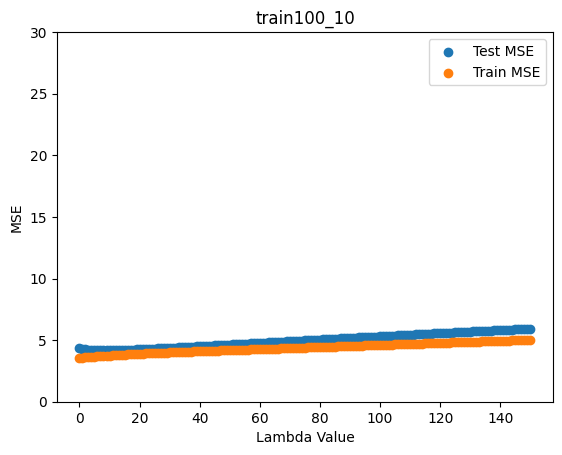

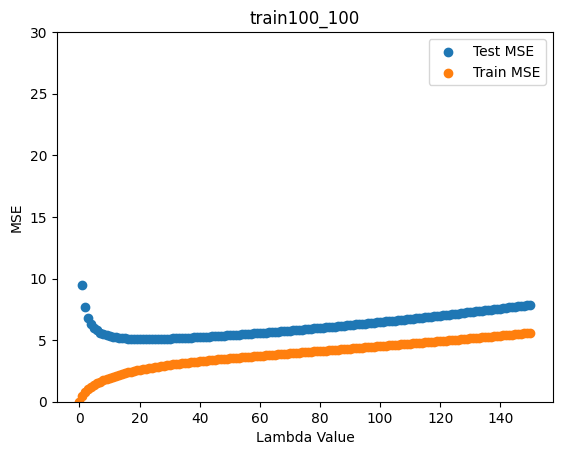

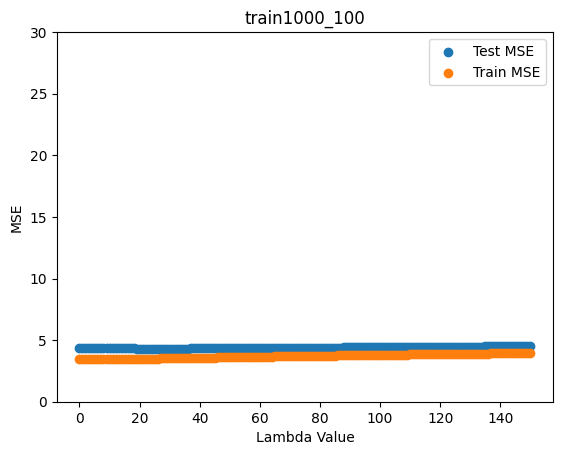

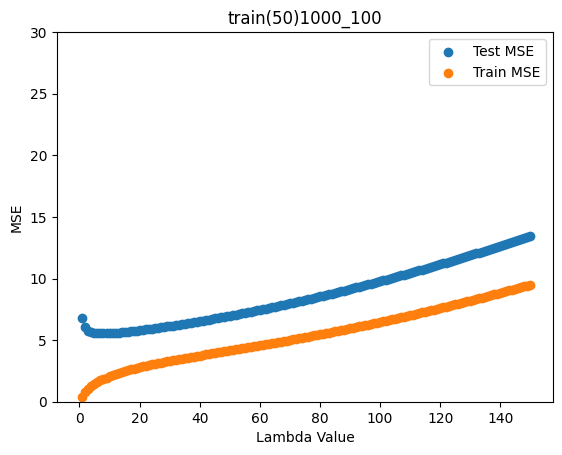

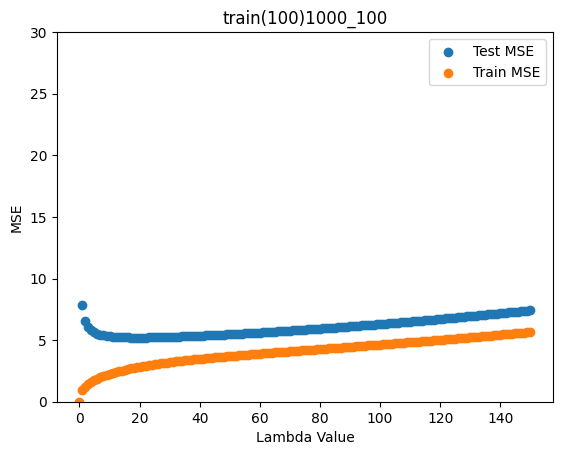

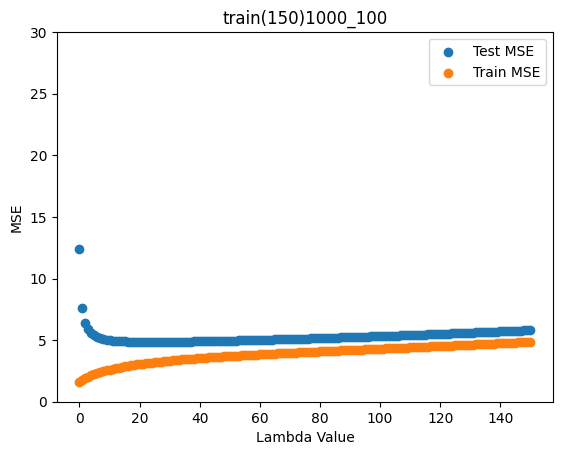

In [11]:
#1
for dataset in datasets:
    L2Plot(dataset)

In [26]:
##1A.
for dataset in datasets:
    temp = []
    for lmbd in range(151):
        w = trainL2Regression(dataset[1],lmbd)
        temp.append((lmbd,MSE(dataset[2],w)))
    traindf = pd.DataFrame(temp,columns=['lambda','MSE'])
    print(dataset[0],traindf[traindf.MSE == traindf.MSE.min()])

train100_10    lambda       MSE
8       8  4.159679
train100_100     lambda     MSE
22      22  5.0783
train1000_100     lambda       MSE
27      27  4.315571
train(50)1000_100    lambda       MSE
8       8  5.540902
train(100)1000_100     lambda       MSE
19      19  5.205912
train(150)1000_100     lambda       MSE
23      23  4.848943


# 1A.
## The values of λ that give the least test set MSE
### "train100_10", λ = 8
### "train100_100", λ = 22
### "train1000_100", λ = 27
### "train(50)1000_100", λ = 8
### "train(100)1000_100", λ = 19
### "train(150)1000_100", λ = 23

# 1B.

In [13]:
datasets1to150 = [
 ['train100_100',train100_100,test100_100],
['train(50)1000_100',train_50_1000_100,test1000_100],
['train(100)1000_100',train_100_1000_100,test1000_100]]

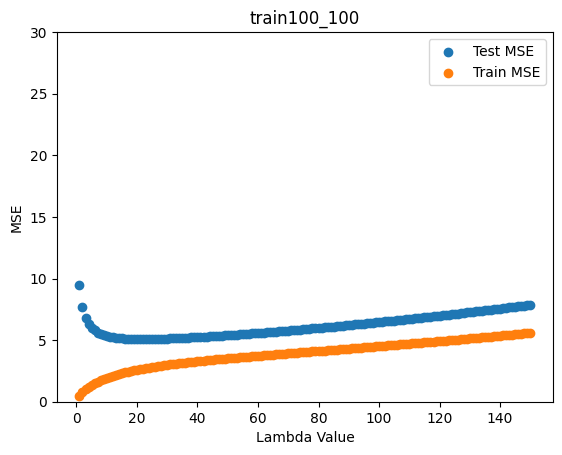

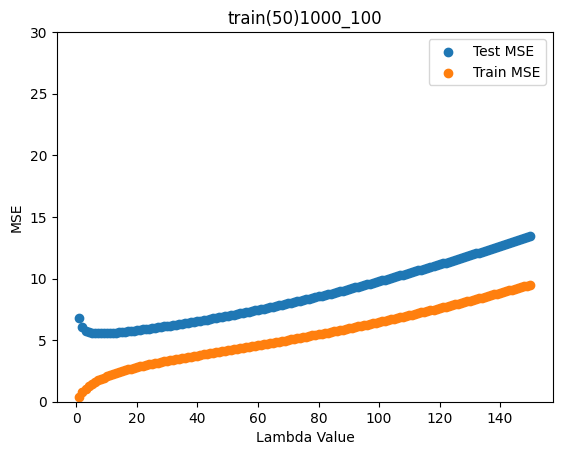

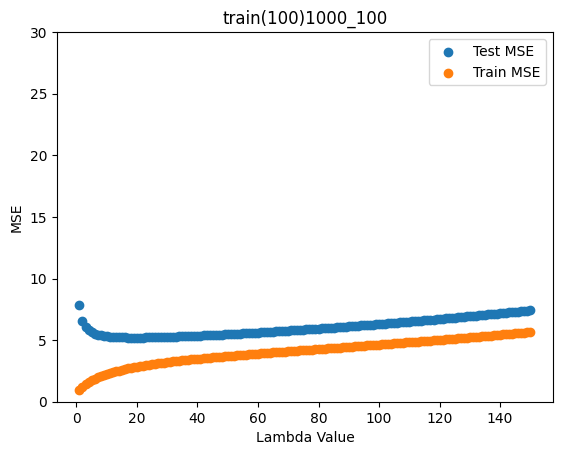

In [14]:
#1B
for dataset in datasets1to150:
    temp = []
    for lmbd in range(1,151):
        w = trainL2Regression(dataset[1],lmbd)
        temp.append((lmbd,MSE(dataset[2],w),MSE(dataset[1],w)))
    traindf = pd.DataFrame(temp,columns=['lambda','MSE','MSE_train'])
    plt.title(dataset[0])
    plt.xlabel("Lambda Value")
    plt.ylabel("MSE")
    ax = plt.gca()
    ax.set_ylim([0,30])
    plt.scatter(traindf['lambda'],traindf['MSE'],label='Test MSE')
    plt.scatter(traindf['lambda'],traindf['MSE_train'],label='Train MSE')
    plt.legend()
    plt.show()

# 1C.
#### The reason why no regularization gives abnormally large MSEs for those datasets is because the size of the datasets is small. With limited amounts of data to train on, testing the data will be more likely to have errors. This is amplified by the lambda value being 0 as there is no regularization being applied within the ridge regression formula. Basically, there are less values and higher variance. Because of these two factors the error will be more extreme because of a lower initial bias

# 2.

In [15]:
def CV10Fold(dataset,k):
    df_split = np.array_split(dataset, 10)
    v=0
    temp = []
    for i in range(len(df_split)):
        fold = df_split[:i] + df_split[i+1:]
        folds = []
        for f in fold:
            folds.append(pd.DataFrame(f))
        trainfold = pd.concat(folds)
        w = trainL2Regression(pd.DataFrame(trainfold),lmbd)
        temp.append(MSE(pd.DataFrame(df_split[i]),w))
    return sum(temp)/10

In [16]:
for dataset in datasets:
    temp = []
    for lmbd in range(151):
        temp.append((lmbd, CV10Fold(dataset[1],lmbd)))
        traindf2 = pd.DataFrame(temp,columns=['lambda','MSE'])
    print(dataset[0],traindf2[traindf2.MSE == traindf2.MSE.min()])

/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train100_10     lambda       MSE
12      12  4.158702


/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train100_100     lambda       MSE
20      20  4.494045


/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train1000_100     lambda       MSE
39      39  4.137141


/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train(50)1000_100     lambda       MSE
24      24  5.300696


/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train(100)1000_100     lambda       MSE
30      30  4.839469


/Users/andrewruder/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


train(150)1000_100     lambda       MSE
46      46  4.868577


# 2A.
## The values of λ that give the least test set MSE using CV technique
### "train100_10", λ = 12
### "train100_100", λ = 20
### "train1000_100", λ = 39
### "train(50)1000_100", λ = 24
### "train(100)1000_100", λ = 30
### "train(150)1000_100", λ = 46
# 2B.
#### The lambda values seem larger for the training datasets that are tested on larger testing sets and the MSE values are all smaller if not relatively equal
# 2C.
#### The drawbacks of cross validation are an increase in computational cost and computational time
# 2D.
####  The number of folds and number of data points within a fold. The more folds there are the more models there are to train and test. The points there are in a fold the more points you have to train/test a model on.

# 3.

/var/folders/wm/lwlxbmjx2hv6p504ygbs86pr0000gn/T/ipykernel_31441/2534630198.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  traindf = pd.concat([traindf,sampledf.mean().to_frame().T])


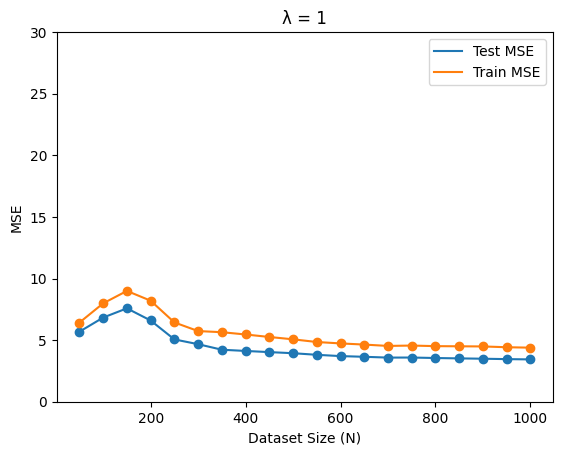

/var/folders/wm/lwlxbmjx2hv6p504ygbs86pr0000gn/T/ipykernel_31441/2534630198.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  traindf = pd.concat([traindf,sampledf.mean().to_frame().T])


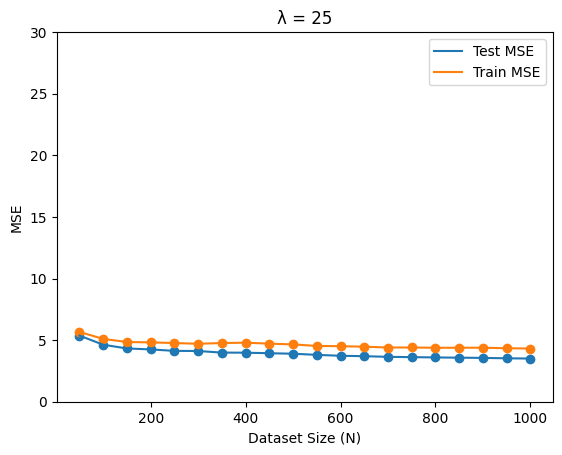

/var/folders/wm/lwlxbmjx2hv6p504ygbs86pr0000gn/T/ipykernel_31441/2534630198.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  traindf = pd.concat([traindf,sampledf.mean().to_frame().T])


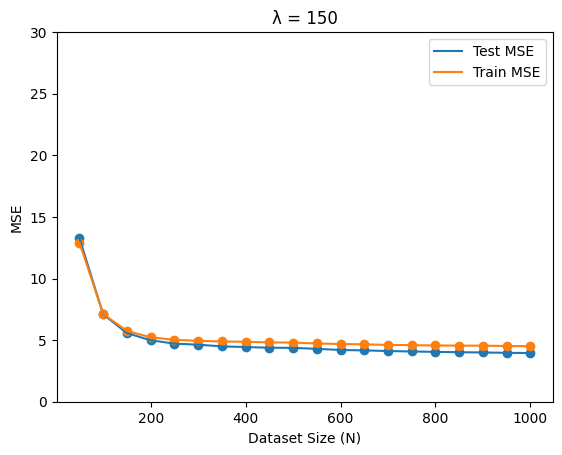

In [17]:
lmbd = [1,25,150]
for k in lmbd:
    traindf = pd.DataFrame(columns=['N','MSE','MSE_train'])
    for i in range(50,len(train1000_100)+1,50):
        samples = []
        for j in range(10):
            sample = train1000_100.sample(n=i,random_state = 1)
            w = trainL2Regression(sample,k)
            samples.append((i,MSE(train1000_100,w),MSE(test1000_100,w)))
            sampledf = pd.DataFrame(samples,columns=['N','MSE','MSE_train'])
        traindf = pd.concat([traindf,sampledf.mean().to_frame().T])
    plt.title("λ = "+str(k))
    plt.xlabel("Dataset Size (N)")
    plt.ylabel("MSE")
    plt.scatter(traindf['N'],traindf['MSE'])
    plt.plot(traindf['N'],traindf['MSE'],label='Test MSE')
    plt.scatter(traindf['N'],traindf['MSE_train'])
    plt.plot(traindf['N'],traindf['MSE_train'],label='Train MSE')
    ax = plt.gca()
    ax.set_ylim([0,30])
    plt.legend()
    plt.show()